# 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder


# Define the path to the Excel file

file_path = r"C:\Users\Aaditya vish\Documents\churnAnalysis full project\New Folder\ViewChurnData.xls"

 

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData'

 

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data
print(data.head())

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
  Customer_ID  Gender  Age Married            State  Number_of_Referrals  \
0   11340-JAM  Female   21      No  Jammu & Kashmir                    8   
1   11348-MAH  Female   46      No      Maharashtra                   11   
2   11359-AND  Female   28     Yes   Andhra Pradesh                    3   
3   11370-TAM  Female   21      No       Tamil Nadu                   15   
4   11392-JAM  Female   39     Yes  Jammu & Kashmir                   11   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7        NaN           Yes             No  ...   
1                19     Deal 3           Yes             No  ...   
2                 6     Deal 4           Yes             No  ...   
3                10     Deal 4           Yes             No  ...   
4                 1     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds

In [7]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
 #Train Random Forest Model
 # Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[807  61]
 [109 225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       868
           1       0.79      0.67      0.73       334

    accuracy                           0.86      1202
   macro avg       0.83      0.80      0.82      1202
weighted avg       0.85      0.86      0.85      1202



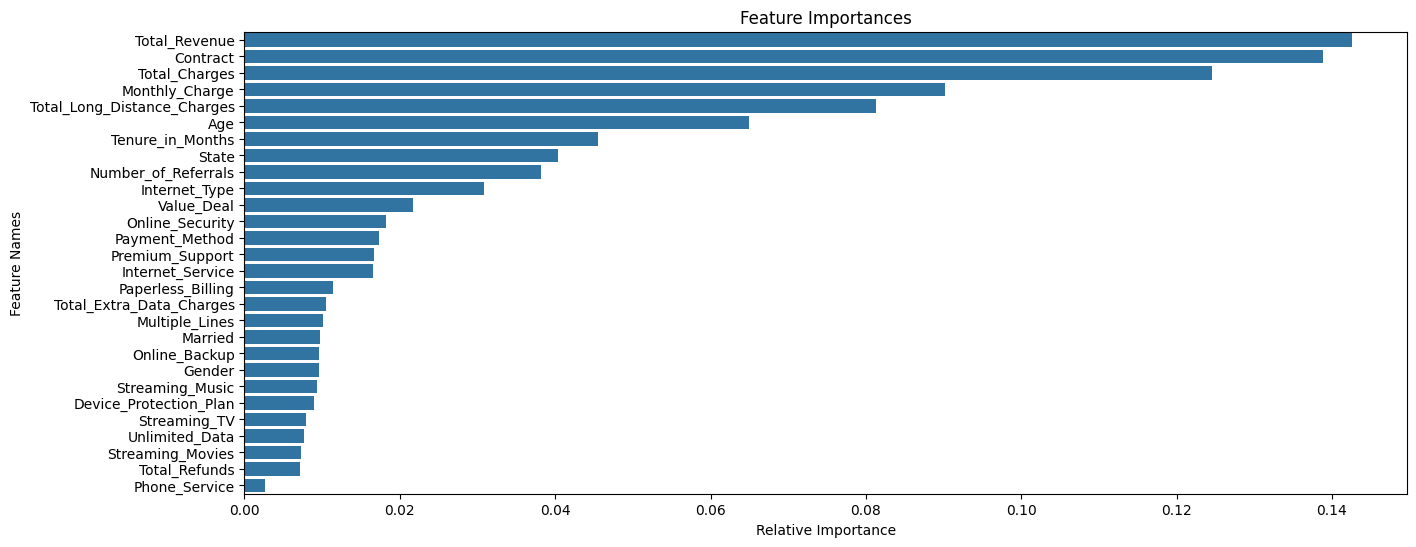

In [4]:
#Evaluate Model

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()